1.Загрузить файл hr.csv. 

2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение). 

3.Рассчитать и визуализировать корреляционную матрицу для переменных. 

4.Визуализировать несколько взаимосвязей между переменными. 

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными. 

6.Рассчитать сколько работников работает в каждом департаменте. 

7.Показать распределение сотрудников по зарплатам. 

8.Показать распределение сотрудников по зарплатам совместно с департаментами. 

9.Сколько сотрудников покинули компанию. 

10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию. 

11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете 

In [1]:
import statistics
import numpy as np
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from scipy import stats as sts
import pandas as pd
import io
import requests
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import pearsonr
import ssl
import researchpy as rp

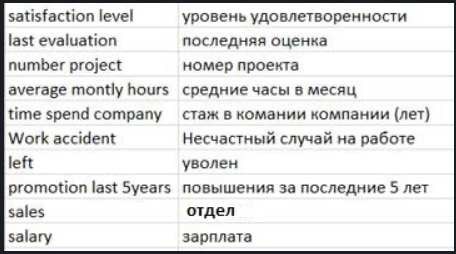

In [2]:
from IPython.display import Image
Image(filename="download.png", width=400, height=400)

1.Загрузить файл hr.csv.

In [3]:
data = pd.read_csv('hr.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


В Датасете 14999 записей:

In [4]:
len(data)

14999

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Вывод:

Данный датасет не содержит пустых значений. 
Содержит 2 переменные с плавающей запятой, 6 переменных целочисленного типа данных а также 2 строчных.

2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [6]:
# через describe
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# c помощью модуля statistics
for i in data.iloc[:,:8].columns:
    print('Среднее значение переменной', i,': ', statistics.mean(data[i]))
    print('Медиана переменной ', i,': ', statistics.median(data[i]))
    try:
        print('Мода переменной ', i,': ', statistics.mode(data[i]))
    except:
        print('!!! Невозможно вычислить моду переменной', i)
    print('Минимальное и максимальное значение переменной ', i,': ', min(data[i]), ' и ', max(data[i]))
    print('Среднее отклонение переменной ', i,': ', statistics.pstdev(data[i]))
    print('\t')

Среднее значение переменной satisfaction_level :  0.6128335222348157
Медиана переменной  satisfaction_level :  0.64
Мода переменной  satisfaction_level :  0.1
Минимальное и максимальное значение переменной  satisfaction_level :  0.09  и  1.0
Среднее отклонение переменной  satisfaction_level :  0.2486223626820733
	
Среднее значение переменной last_evaluation :  0.7161017401160077
Медиана переменной  last_evaluation :  0.72
Мода переменной  last_evaluation :  0.55
Минимальное и максимальное значение переменной  last_evaluation :  0.36  и  1.0
Среднее отклонение переменной  last_evaluation :  0.1711634045107436
	
Среднее значение переменной number_project :  3.80305353690246
Медиана переменной  number_project :  4
Мода переменной  number_project :  4
Минимальное и максимальное значение переменной  number_project :  2  и  7
Среднее отклонение переменной  number_project :  1.2325512654823438
	
Среднее значение переменной average_montly_hours :  201.0503366891126
Медиана переменной  average_

3.Рассчитать и визуализировать корреляционную матрицу для переменных.

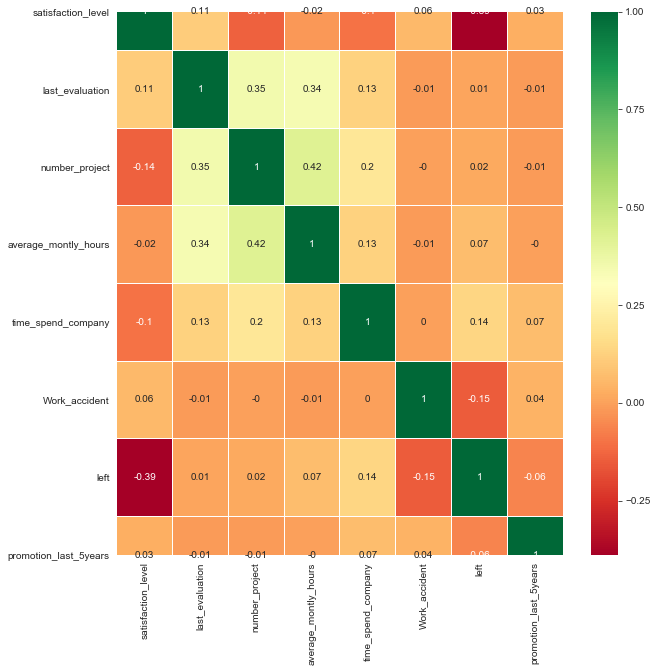

In [8]:
f, ax = plt.subplots(figsize=(10, 10))
corr = np.round_(data.corr(), decimals=2)
sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.2)

Вывод:

Данная матрица показывает что относительно высокий коэффициент корреляции существует между такими параметрами как
average_monthly_hours и number_project, значит что на какие-то проекты компании были более трудоемкие и людям приходилось тратить больше рабочего времени чем на другие. 
Также стоит отметить о наличии обратной корреляции между такими атрибутами как увольнением и удовлетворенностью, значит чаще комапнию покидали люди не довольные условиями труда или заработной платой.
Остальные атрибуты не имеют достаточной корреляции.

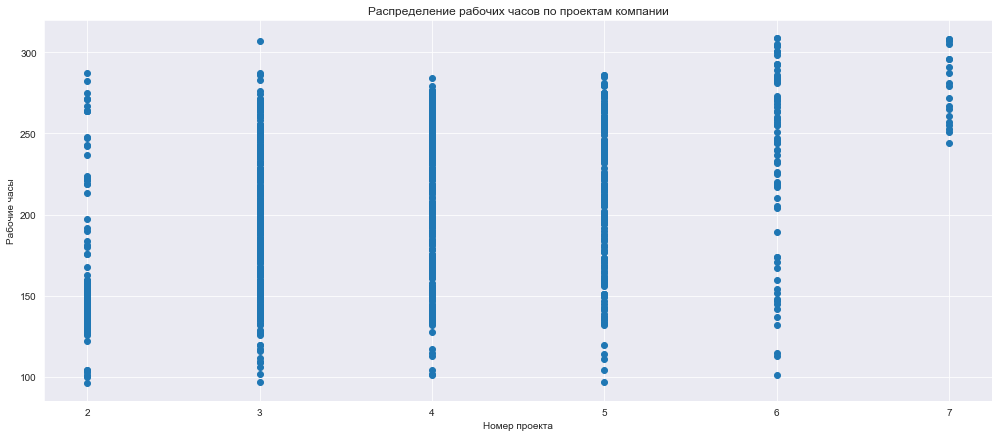

In [9]:
# К примеру...
from pylab import rcParams
rcParams['figure.figsize'] = 17,7
data2 = data.sample(1000)
plt.scatter(data2.number_project, data2.average_montly_hours)
plt.title('Распределение рабочих часов по проектам компании')
plt.xlabel('Номер проекта')
plt.ylabel('Рабочие часы')
plt.show()

К примеру, на графике видно, что на 2 проекте большинство людей работали от 100 до 140 часов, однако на 7 проекте 
люди тратили больше времени преимущественно от 250 до 310 часов. Это подтверждает факт наличия корреляции между такими параметрами как average_monthly_hours и number_project. (см. выше на корреляционную матрицу)

4.Визуализировать несколько взаимосвязей между переменными.

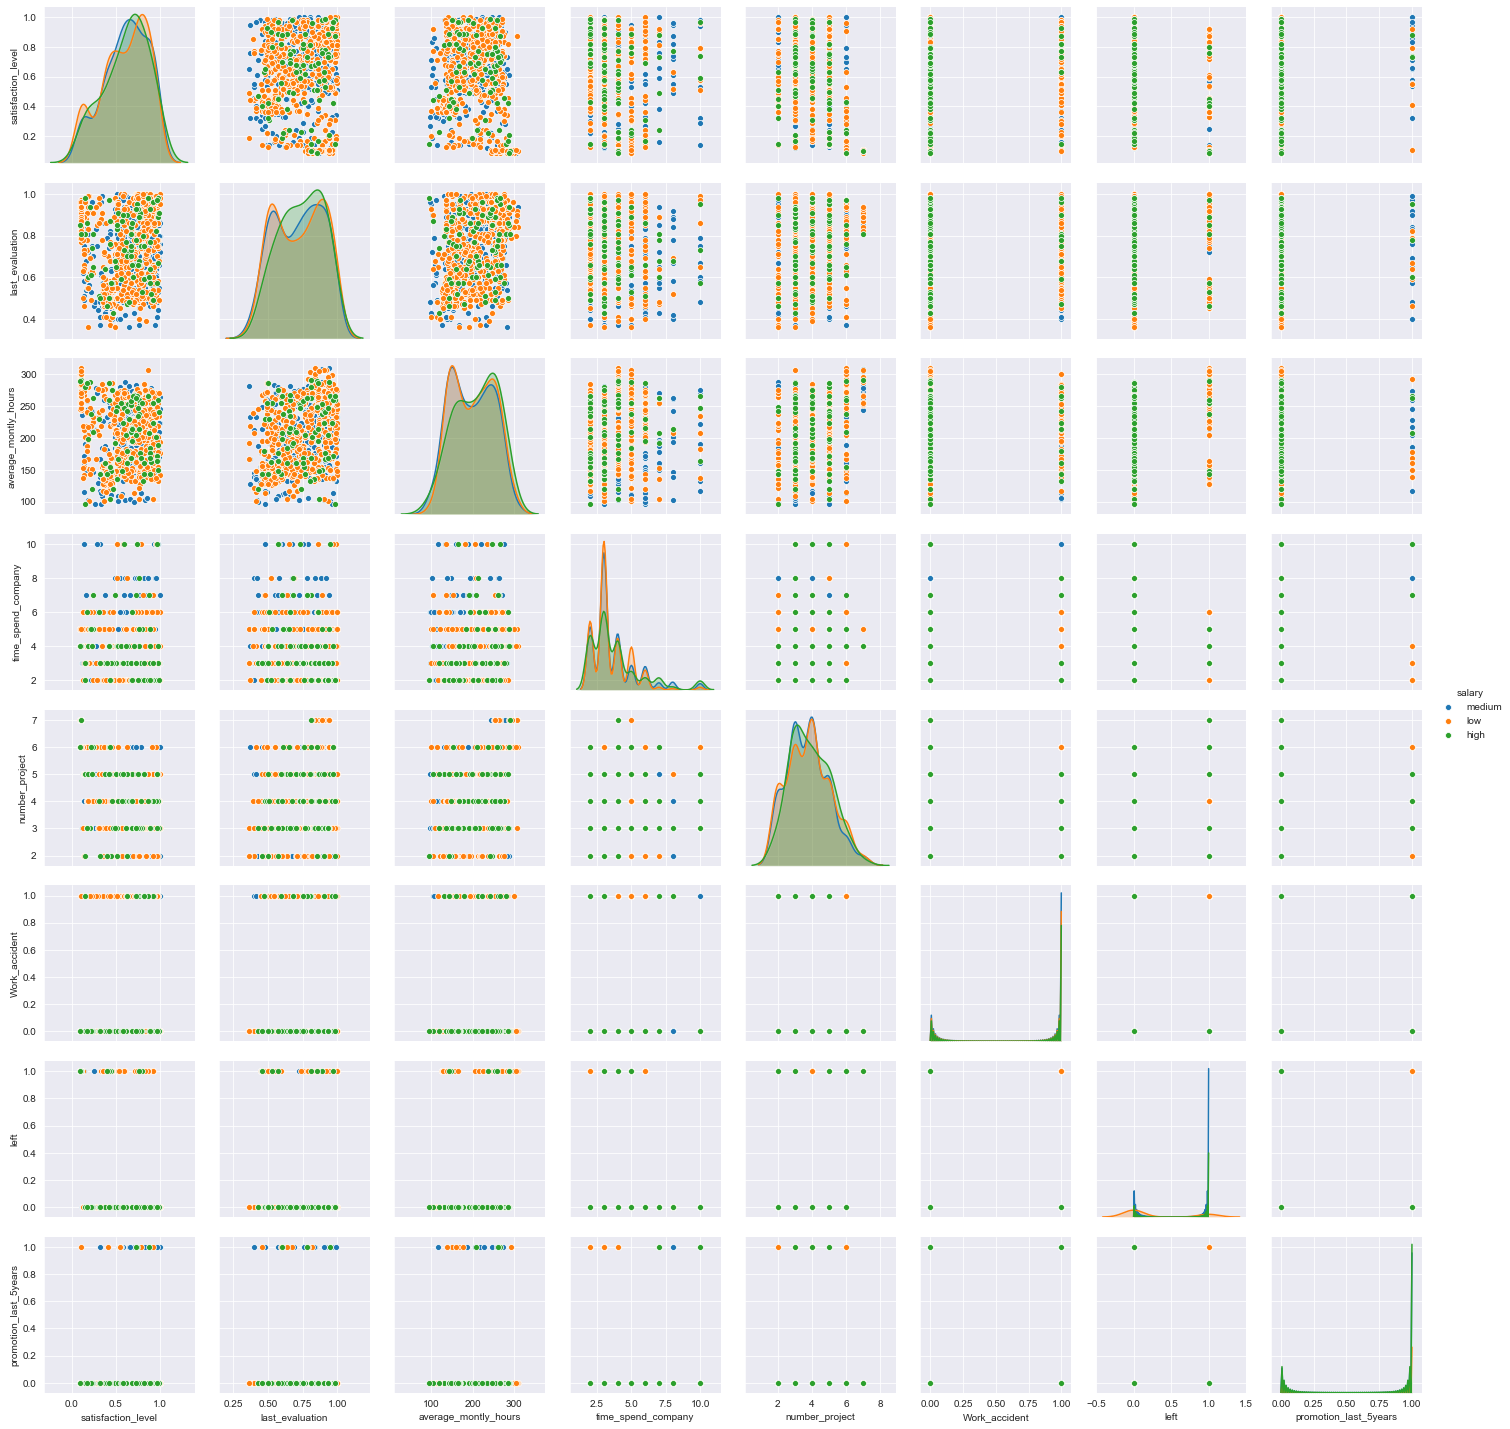

In [10]:
sns.pairplot(data=data2[['satisfaction_level','last_evaluation',
                        'average_montly_hours', 'time_spend_company', 'number_project', 
                        'Work_accident', 'left','promotion_last_5years', 'salary']], 
                         hue='salary')
plt.show()

Вывод:

Визуально переменные в датасете имеют очень слабую взаимосвязь. 

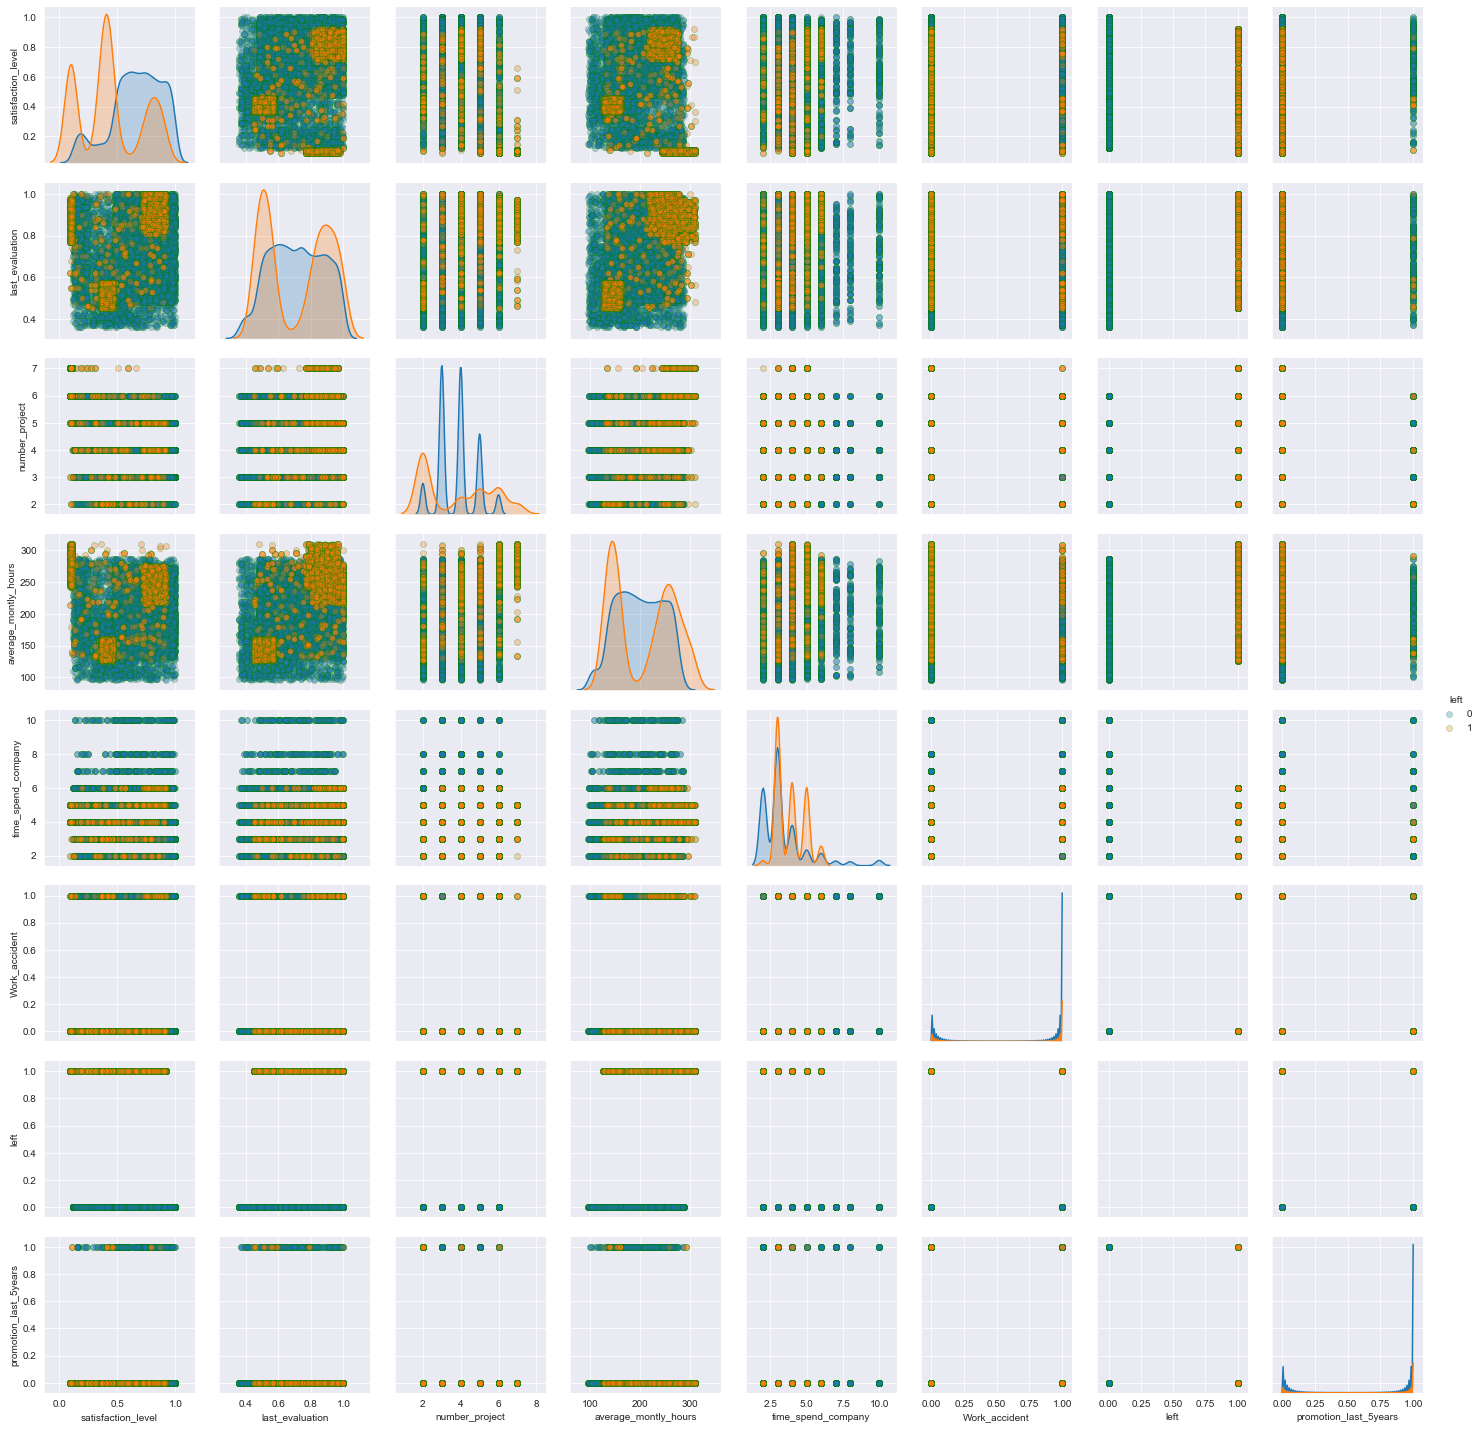

In [12]:
import warnings
warnings.filterwarnings("ignore")
# теперь разделим на уволен/не уволен
sns.pairplot(data=data,
             plot_kws={'edgecolor':'green', 'alpha':0.3},
             hue='left')

Вывод:

На графиках видны скопления покинувших компанию сотрудников, выделены желтым цветом.
Эти данные помогут для дальнейшего анализа причин уволенения сотрудников.

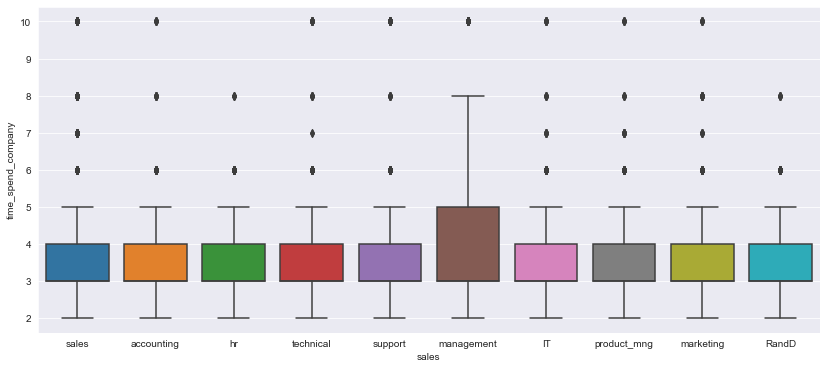

In [13]:
plt.rcParams['figure.figsize']=(14,6)
ax = sns.boxplot(x="sales", y="time_spend_company", data=data)

Вывод:

Работники менеджмента работают в среднем больше чем сотрудники в других департаментах

______________________

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [14]:
# проверим взаимосвязь между всеми переменными
for i in data.iloc[:,:7].columns:
    for j in data.iloc[:,:7].columns:
        if i==j:
            continue
        print('для переменных {} и {}'.format(i,j),'\n')
        print(sts.ttest_ind(data[i],data[j]))
        print("________________________")
       
        


для переменных satisfaction_level и last_evaluation 

Ttest_indResult(statistic=-41.89868154070206, pvalue=0.0)
________________________
для переменных satisfaction_level и number_project 

Ttest_indResult(statistic=-310.721972689063, pvalue=0.0)
________________________
для переменных satisfaction_level и average_montly_hours 

Ttest_indResult(statistic=-491.5064991295991, pvalue=0.0)
________________________
для переменных satisfaction_level и time_spend_company 

Ttest_indResult(statistic=-238.58170166684755, pvalue=0.0)
________________________
для переменных satisfaction_level и Work_accident 

Ttest_indResult(statistic=133.13298501842021, pvalue=0.0)
________________________
для переменных satisfaction_level и left 

Ttest_indResult(statistic=93.06077566920372, pvalue=0.0)
________________________
для переменных last_evaluation и satisfaction_level 

Ttest_indResult(statistic=41.89868154070206, pvalue=0.0)
________________________
для переменных last_evaluation и number_project 


Вывод:

p-value равен 0 или имеет близкое ему значение во всех тестах, то есть меньше альфа значения 0.05:
Можно сделать вывод что все переменные имеют статистическое различие и между переменными не существует взаимосвязи.

___________

Проверим нулевую гипотезу:

Из графика выше видно что работники менеджмента работают в среднем больше чем сотрудники в других департаментах
Сравним уровень удовлетворенность работников менеджмента с работниками в бухгалтерии.

Нулевая гипотеза говорит о том, что удовлетворенность работников бухгалтерии и менеджмента одинаковая.
Проверим!

In [15]:
management = data[ data['sales']=='management' ]['satisfaction_level']
accounting = data[ data['sales']=='accounting' ]['satisfaction_level']

In [16]:
# сравним размер выборок
len(management), len(accounting)

(630, 767)

In [17]:
# сэмплинг
accounting = accounting.sample(630)

In [18]:
ttest_ind(management, accounting, equal_var=False)

Ttest_indResult(statistic=2.8830549112541055, pvalue=0.004006143281933791)

Вывод:

P-value меньше альфа значения 0.05, значит мы можем отвергнуть нулевую гипотезу и утверждать что между работниками департаментов менеджмента и бухгалтерии имеется различие.

6.Рассчитать сколько работников работает в каждом департаменте.

In [19]:
data_working = data[ data['left']!=1 ]  # сотрдуники работающие в комапнии на данный момент

In [20]:
print('Кол-во работников по департаментам:')
workers_department = data_working.sales.value_counts().to_frame()  # работников в каждом департаменте
data_working.sales.value_counts()

Кол-во работников по департаментам:


sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: sales, dtype: int64

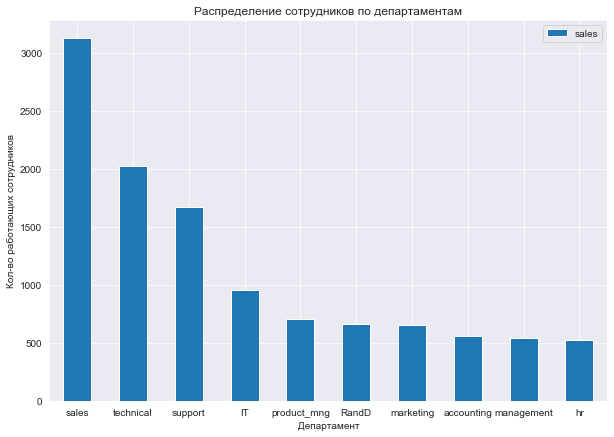

In [21]:
rcParams['figure.figsize'] = 10,7
workers_department.plot(kind='bar')
plt.title('Распределение сотрудников по департаментам')
plt.xlabel('Департамент')
plt.ylabel('Кол-во работающих сотрудников')
plt.xticks(rotation='horizontal')
plt.show()

Вывод:

Больше всего сотрудников работает в департаменте продаж, меньше всего в Управлении кадров    

7.Показать распределение сотрудников по зарплатам.

In [22]:
workers_barh = data_working.salary.value_counts().to_frame()


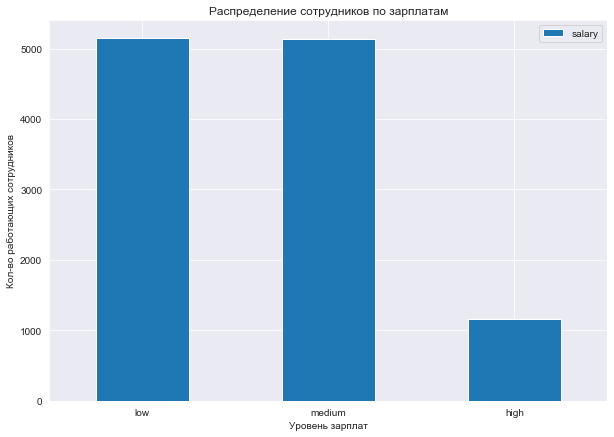

In [23]:
rcParams['figure.figsize'] = 10,7
workers_barh.plot(kind='bar')
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Уровень зарплат')
plt.ylabel('Кол-во работающих сотрудников')
plt.xticks(rotation='horizontal')
plt.show()

Вывод:
    
Распределение низких и средних зарплат в комапнии одинаковое. А сотрудников с высокими окладами в 5 раз меньше     

8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [24]:
new = data_working.groupby([data_working.salary, data_working.sales]).count().iloc[:,:1]
new.columns = ['cnt']

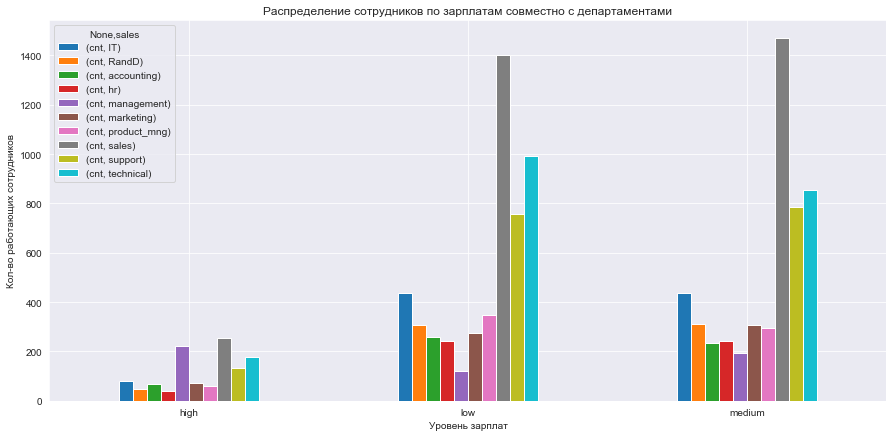

In [25]:
rcParams['figure.figsize'] = 15,7
new.unstack('sales').plot(kind='bar')
plt.title('Распределение сотрудников по зарплатам совместно с департаментами')
plt.xlabel('Уровень зарплат')
plt.ylabel('Кол-во работающих сотрудников')
plt.xticks(rotation='horizontal')
plt.show()

Вывод:

Распределение сотрудников совместно с депараментами получающих низкие и средние оклады примерно одинаковое.
Однако в сегменте высоких зарплат наблюдается другая картина распределения, высокие зарплаты получают как правило работники продаж, а также менеджмента.

9.Сколько сотрудников покинули компанию.

In [26]:
print('За все время {} сотрудник покинул комапнию'.format(data[data['left']==1].left.count()))

За все время 3571 сотрудник покинул комапнию


________________

10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [27]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


 Создаем две выборки люди, которые больше не работают в компании и работники организации

In [28]:
employees_left = data[ data['left']==1 ] # уволен
employees = data[ data['left']!=1 ] # работает

___________

Протестируем гипотезу что люди уволенные имеют меньший уровень удовлетворенности 

In [29]:
descriptives, results = rp.ttest(employees_left.satisfaction_level, employees.satisfaction_level)
print(descriptives)
print('_______________________________________')
print(results)

             Variable        N      Mean        SD        SE  95% Conf.  \
0  satisfaction_level   3571.0  0.440098  0.263933  0.004417   0.431438   
1  satisfaction_level  11428.0  0.666810  0.217104  0.002031   0.662829   
2            combined  14999.0  0.612834  0.248631  0.002030   0.608854   

   Interval  
0  0.448758  
1  0.670790  
2  0.616813  
_______________________________________
                                  Independent t-test     results
0  Difference (satisfaction_level - satisfaction_...     -0.2267
1                              Degrees of freedom =   14997.0000
2                                               t =     -51.6128
3                           Two side test p value =       0.0000
4                          Difference < 0 p value =       0.0000
5                          Difference > 0 p value =       1.0000
6                                       Cohen's d =      -0.9895
7                                       Hedge's g =      -0.9894
8                 

По тесту можно сделать вывод, что средний уровень удовлетвореннсти у людей уволенных(0.44) ниже чем у людей
которые работают в комапнии (0.67)
Также можно заметить что есть разница между выборками p-value < 0.05

_____________

Протестируем гипотезу что уволенные работники получили меньшую оценку на тесте чем те, которые работают в компании

In [30]:
descriptives, results = rp.ttest(employees_left.last_evaluation, employees.last_evaluation)
print(descriptives)
print('_______________________________________')
print(results)

          Variable        N      Mean        SD        SE  95% Conf.  Interval
0  last_evaluation   3571.0  0.718113  0.197673  0.003308   0.711627  0.724598
1  last_evaluation  11428.0  0.715473  0.162005  0.001515   0.712503  0.718444
2         combined  14999.0  0.716102  0.171169  0.001398   0.713362  0.718841
_______________________________________
                                  Independent t-test     results
0  Difference (last_evaluation - last_evaluation) =       0.0026
1                              Degrees of freedom =   14997.0000
2                                               t =       0.8042
3                           Two side test p value =       0.4213
4                          Difference < 0 p value =       0.7894
5                          Difference > 0 p value =       0.2106
6                                       Cohen's d =       0.0154
7                                       Hedge's g =       0.0154
8                                   Glass's delta =       0

Гипотеза не прошла проверку.
Средняя оценка уволенных работников чуть выше (0.718 против 0.715), 
А также p-value > 0.05, можно сделать вывод что эти две выборки имеют статистическое сходство

__________________________

Протестируем гипотезу о том, что работники покинувшие комапнию получали меньше повышений за последние 5 лет.

In [31]:
descriptives, results = rp.ttest(employees_left.promotion_last_5years, employees.promotion_last_5years)
print(descriptives)
print('_______________________________________')
print(results)

                Variable        N      Mean        SD        SE  95% Conf.  \
0  promotion_last_5years   3571.0  0.005321  0.072759  0.001218   0.002933   
1  promotion_last_5years  11428.0  0.026251  0.159889  0.001496   0.023320   
2               combined  14999.0  0.021268  0.144281  0.001178   0.018959   

   Interval  
0  0.007708  
1  0.029183  
2  0.023577  
_______________________________________
                                  Independent t-test     results
0  Difference (promotion_last_5years - promotion_...     -0.0209
1                              Degrees of freedom =   14997.0000
2                                               t =      -7.5812
3                           Two side test p value =       0.0000
4                          Difference < 0 p value =       0.0000
5                          Difference > 0 p value =       1.0000
6                                       Cohen's d =      -0.1453
7                                       Hedge's g =      -0.1453
8     

Из теста можно сделать вывод что между выборками имеется статистическое различие, p-value < 0.05.
А также из расчета среднего значения видно, что сотрудники работающие в команпии чаще получали повышение за последние 5 лет.

_______

Узнаем на каком проекте люди чаще увольнялись.

In [32]:
left = data[data['left']==1].groupby(['number_project']).count().iloc[:,:1]

In [33]:
all_ = data.groupby(['number_project']).count().iloc[:,:1]

Построим график количества всех работников по каждому проекту  

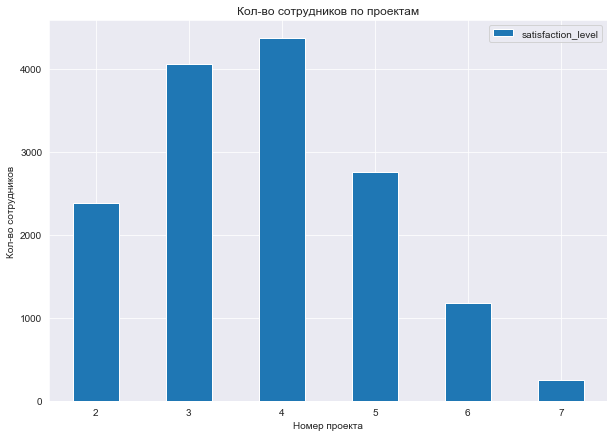

In [34]:
rcParams['figure.figsize'] = 10,7
all_.plot(kind='bar') # все сотрудники
plt.title('Кол-во сотрудников по проектам')
plt.xlabel('Номер проекта')
plt.ylabel('Кол-во сотрудников')
plt.xticks(rotation='horizontal')
plt.show()

Построим график по количеству уволенных сотрудников по проектам

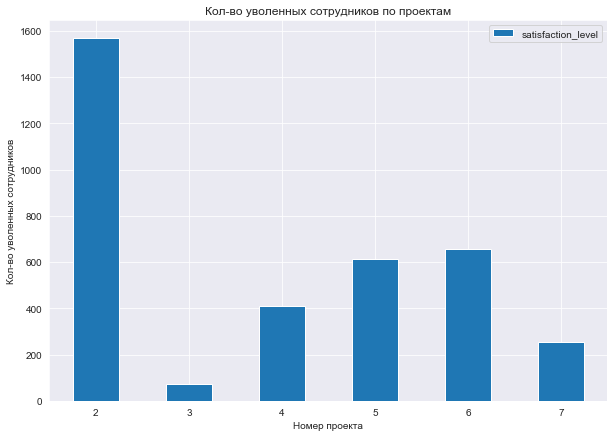

In [35]:
rcParams['figure.figsize'] = 10,7
left.plot(kind='bar')  # уволенные
plt.title('Кол-во уволенных сотрудников по проектам')
plt.xlabel('Номер проекта')
plt.ylabel('Кол-во уволенных сотрудников')
plt.xticks(rotation='horizontal')
plt.show()

Из графика можно сделать вывод, что бОльшая часть уволенных людей принимала участие во втором проекте!
А с проекта номер 3 уволилось меньше людей чем с других проектов.